# Homework 4

This homework asks whether or not Neural Networks will continue to be used, hand calculate a back propagation, and create a Keras model for the fashion_mnist dataset.

Author: Luke Steffen (lhs3)

Version: 04/23/2020

## Question 1

I believe that deep neural networks or not a bust and that they will be used years into the future. In many ways, neural networks have already proven themselves to be useful to businesses in ways that perceptrons and expert systems never did. NNs are already used for a number of tasks in businesses today, ranging from facial recognition to data grouping to vulnerability assessment. Machine learning and nerual networks are already being used in business settings, and this is not likely to change in the future. At the rate at which AI is growing, neural networks will most likely become the new standard in many business areas, both benefiting and replacing jobs. This trend has no sign of slowing down. This makes sense because NNs have been given an advantage that no other form of AI has seen before, big data. The amount of data generated has become large enough for machine learning models to make highly accurate predictions. This phenomenon is something that older forms of AI were not able to take advantage of. Because machine learning is able to leverage the vast amounts of data being produced today, NNs will inevitably be used more frequently. However, NNs will not be a silver bullet for business.

While NNs can be used for a number of tasks, it is not the golden solution that many people may think it is. Neural networks are able to solve many problems and allow for new possibilities for many industries, but we will not be able to solve every problem by throwing a NN at it. Some problems do not fit the machine learning model well, and some tasks are too complicated or too detail-oriented for machine learning to handle. There is a level of intelligence humans possess that makes us able to solve problems, understand nuance, and analyze issues in a way machine learning and NNs cannot. People will always be a necessary part of business, and while NNs can help solve many issues, there is a limit to what they can do.

## Question 2

Back propagation for the XOR deep network. Network shown below.

                        input1  input2                               input1   input2
               (weight1a)  \      /  (weight2a)              (weight1b)  \     /   (weight2b)
                            \    /                                        \   /
                           AND Node   <- bias1                           OR Node   <- bias1
                               |                                            |
                               |                                            |
                                \                                          /
                                 \                                        /
                                  \                                      /
                                   \                                    /
                                    \                                  /
                                     \                                /
                                      \                              /
                                       \                            /
                                        \ weight3a        weight3b /
                                         -------            -------
                                                \          /
                                         bias2 -> XOR Node
                                                     |
                                                     |
                                                     |
                                                   Output



**Initial Weights**

weight1a = 0.11 

weight1b = 0.12

weight2a = 0.21

weight2b = 0.08

weight3a = 0.14

weight3b = 0.15

**First Forward Pass**

o = (1, 0) * (0.11, 0.21, 0.12, 0.08) * (0.14, 0.15)

o = (1 * 0.11 + 0 * 0.21, 1 * 0.12 + 0 * 0.08) * (0.14, 0.15)

o = (0.11, 0.12) * (0.14, 0.15)

o = (0.11 * 0.14 + 0.12 * 0.15)

o = 0.0334

**Error Calculation**

error = (1 - 0.0334)^2

error = 0.93431556

delta = (1 - 0.0334)

delta = 0.9666

**Back Propagation**

Learning Rate = 0.05

Activation function: f(x) = x (Derivative is 1)

(weight3a, weight3b) = (0.14, 0.15) + 0.05 * (0.11, 0.12) * 1.0 * 0.9666

(weight3a, weight3b) = (0.14, 0.15) + (0.0053163, 0.0057996)

(weight3a, weight3b) = (0.1453163, 0.1557996)

(weight1a, weight2a, weight1b, weight2b) = (0.11, 0.21, 0.12, 0.08) + 0.05 * (1, 0, 1, 0) * 1.0 x (0.14, 0.14, 0.15, 0.15) * 0.9666

(weight1a, weight2a, weight1b, weight2b) = (0.11, 0.21, 0.12, 0.08) + (0.05, 0, 0.05, 0) x (0.135324, 0.135324, 0.14499, 0.14499)

(weight1a, weight2a, weight1b, weight2b) = (0.11, 0.21, 0.12, 0.08) + (0.05 * 0.135324, 0 * 0.135324, 0.05 * 0.14499, 0 * 0.14499)

(weight1a, weight2a, weight1b, weight2b) = (0.11, 0.21, 0.12, 0.08) + (0.0067662, 0, 0.0072495, 0)

(weight1a, weight2a, weight1b, weight2b) = (0.1167662, 0.21, 0.1272495, 0.08)

## Question 3

Import dataset

In [0]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Display size and shape of training and testing data. Also display an image from the
dataset. Code pulled from keras-mnist.ipynb.

training images         
	count: 60000         
	shape: (60000, 28, 28)         
	image data type: uint8         
	label data type: uint8
 testing images         
	count: 10000         
	shape: (10000, 28, 28)
 example:         
	pixel value: 23         
	label value: 9
 example image:


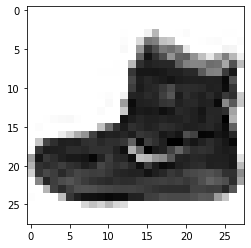

In [45]:
print(
    f'training images \
        \n\tcount: {len(train_labels)} \
        \n\tshape: {train_images.shape} \
        \n\timage data type: {train_images.dtype} \
        \n\tlabel data type: {train_labels.dtype}\n',
    f'testing images \
        \n\tcount: {len(test_labels)} \
        \n\tshape: {test_images.shape}\n',
    f'example: \
        \n\tpixel value: {train_images[0,5,20]} \
        \n\tlabel value: {train_labels[0]}\n',
    'example image:'
)

import matplotlib.pyplot as plt

digit_image = train_images[0]
plt.imshow(digit_image, cmap=plt.cm.binary)

Create convolutional neural network. Code pulled from keras-cnn.ipynb.

In [49]:
from keras import layers
from keras import models

model = models.Sequential()

# Configure a convnet with 3 layers of convolutions and max pooling.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add layers to flatten the 2D image and then do a 10-way classification.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_18 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
_______________________________________________

Convert fashion_mnist training and testing datasets into categorical data. Code
pulled from keras-cnn.ipynb.

In [0]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Train and evaluate the model

In [50]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
model.evaluate(test_images, test_labels)



Epoch 1/5
60000/60000 [==============================] - 47s 786us/step - loss: 0.4339 - accuracy: 0.8442
Epoch 2/5
60000/60000 [==============================] - 47s 783us/step - loss: 0.2715 - accuracy: 0.9007
Epoch 3/5
60000/60000 [==============================] - 46s 773us/step - loss: 0.2239 - accuracy: 0.9184
Epoch 4/5
60000/60000 [==============================] - 46s 764us/step - loss: 0.1934 - accuracy: 0.9297
Epoch 5/5
10000/10000 [==============================] - 3s 260us/step


[0.24731772054433823, 0.9157999753952026]

The most accurate network I was able to find I the network above. This network involves two convolutions and one max pooling, along with one dense layer and one output layer. Trained over 5 epochs, I was able to get 91.58% accuracy.